Matplotlib is building the font cache; this may take a moment.


Dataset Shape: (3759, 2)

Label Distribution:
label
0    1987
1    1772
Name: count, dtype: int64
Training set size: (3007, 5000)
Testing set size: (752, 5000)
Model Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      0.97      0.96       377
        Spam       0.96      0.95      0.96       375

    accuracy                           0.96       752
   macro avg       0.96      0.96      0.96       752
weighted avg       0.96      0.96      0.96       752



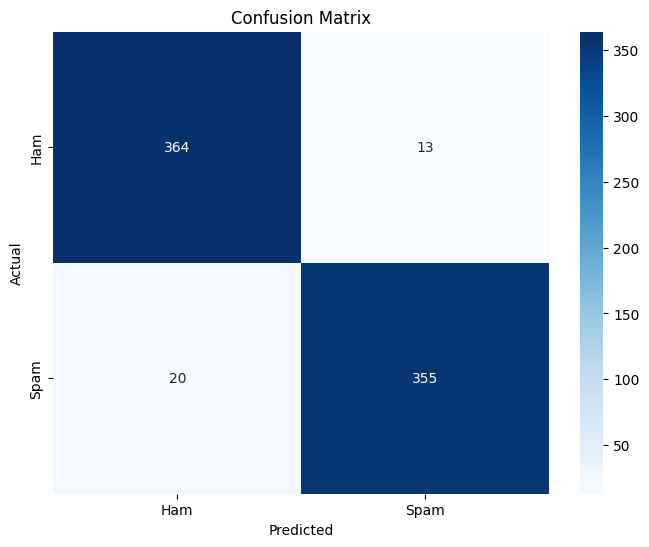

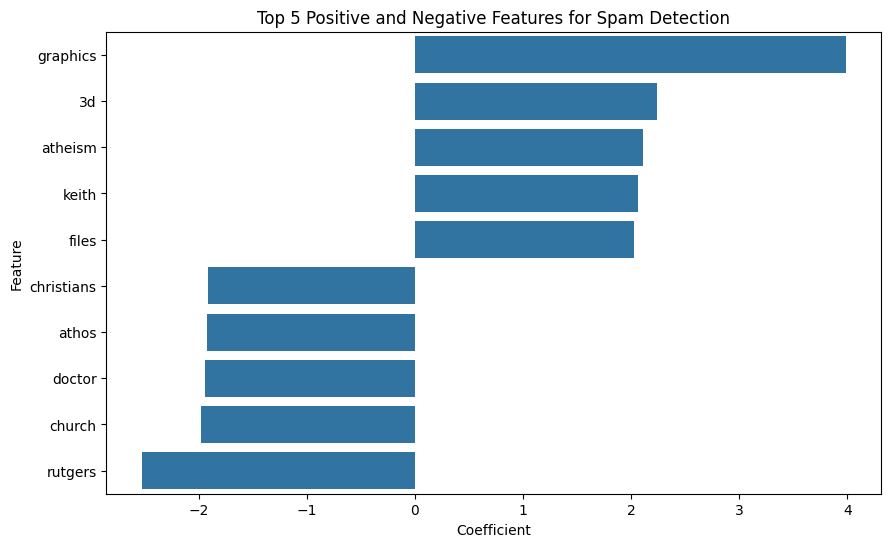


Email: Win a free iPhone now! Click here to claim your pr...
Prediction: Spam

Email: Hi, let's schedule a meeting for next week to disc...
Prediction: Ham

Model and vectorizer saved successfully!


In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings('ignore')

# Cell 2: Load and Prepare Data
# Using a subset of the 20 newsgroups dataset for spam-like classification
# We'll treat some categories as "spam" and others as "ham"
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# Create a DataFrame
data = pd.DataFrame({
    'text': newsgroups.data,
    'label': newsgroups.target
})

# Simulate spam/ham labels: treat 'alt.atheism' and 'soc.religion.christian' as spam (1), others as ham (0)
data['label'] = data['label'].apply(lambda x: 1 if x in [0, 1] else 0)

print("Dataset Shape:", data.shape)
print("\nLabel Distribution:")
print(data['label'].value_counts())

# Cell 3: Data Preprocessing
# Split features and target
X = data['text']
y = data['label']

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Cell 4: Train the Model
# Initialize and train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Cell 5: Evaluate the Model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cell 6: Feature Importance
# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Create DataFrame of features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot top 10 positive and negative features
plt.figure(figsize=(10, 6))
top_features = pd.concat([feature_importance.head(5), feature_importance.tail(5)])
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.title('Top 5 Positive and Negative Features for Spam Detection')
plt.show()

# Cell 7: Example Prediction
# Function to predict if a new email is spam
def predict_email(email_text):
    email_tfidf = vectorizer.transform([email_text])
    prediction = model.predict(email_tfidf)
    return "Spam" if prediction[0] == 1 else "Ham"

# Test with example emails
example_emails = [
    "Win a free iPhone now! Click here to claim your prize!",
    "Hi, let's schedule a meeting for next week to discuss the project."
]

for email in example_emails:
    print(f"\nEmail: {email[:50]}...")
    print(f"Prediction: {predict_email(email)}")

# Cell 8: Save the Model
import joblib
joblib.dump(model, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("\nModel and vectorizer saved successfully!")